# World Health Organization Data

## Global Health Observatory

* [Data query API](https://apps.who.int/gho/data/node.resources.api)
* [GHO OData API ](https://www.who.int/data/gho/info/gho-odata-api)

Para se determinar o tipo de informação para acesso veja a [lista de dimensões e códigos](https://apps.who.int/gho/athena/api/GHO). Utilize o código disponível no campo `<Code label="">`. Por exemplo, no campo `<Code Label="WHOSIS_000001">` é possível encontrar o código `WHOSIS_000001` que indica `Life expectancy at birth (years)`.

Depois de estabelecida a informação, podem ser configurados parâmetros, com o sufixo `?` depois da URL. Os parâmetros são separados por `?`.

Os códigos dos países são encontrados em: [https://apps.who.int/gho/athena/api/COUNTRY](https://apps.who.int/gho/athena/api/COUNTRY).

## Importando dados em JSON no Python

![JSON](json.png)

In [20]:
import io
import requests
import json
url = "https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001?filter=COUNTRY:BRA&format=json"
js = requests.get(url).content
print(js.decode("utf-8"))

{
"copyright": "(c) World Health Organization",
"dataset":
[
{
"label": "CYCU",
"display": "COUNTRY_YEARLY_CORE_UNITS"
}
],
"attribute":
[
{
"label": "DS",
"display": "DS"
},
{
"label": "FIPS",
"display": "FIPS"
},
{
"label": "IOC",
"display": "IOC"
},
{
"label": "ISO2",
"display": "ISO2"
},
{
"label": "ISO",
"display": "ISO"
},
{
"label": "ITU",
"display": "ITU"
},
{
"label": "MARC",
"display": "MARC"
},
{
"label": "WHO",
"display": "WHO"
},
{
"label": "WMO",
"display": "WMO"
},
{
"label": "GEOMETRY",
"display": "GEOMETRY"
},
{
"label": "MORT",
"display": "MORT"
},
{
"label": "LAND_AREA_KMSQ_2012",
"display": "LAND_AREA_KMSQ_2012"
},
{
"label": "LANGUAGES_EN_2012",
"display": "LANGUAGES_EN_2012"
},
{
"label": "WHO_REGION",
"display": "WHO_REGION"
},
{
"label": "WHO_REGION_CODE",
"display": "WHO_REGION_CODE"
},
{
"label": "WORLD_BANK_INCOME_GROUP",
"display": "World Bank income group"
},
{
"label": "WORLD_BANK_INCOME_GROUP_CODE",
"display": "World Bank income group code"
},
{
"label": 

In [21]:
js=json.loads(js)
print(js['copyright'])

(c) World Health Organization


## Importando dados em CSV no Python

![CSV](csv.png)

In [1]:
import pandas as pd
import io
import requests
url = "https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001?filter=COUNTRY:BRA&format=csv"
data = requests.get(url).content
csv = pd.read_csv(io.StringIO(data.decode("utf-8")))
print(csv.SEX.head())

0    MLE
1    MLE
2    MLE
3    MLE
4    MLE
Name: SEX, dtype: object


# Importando dados em XML no Python

![XML](xml.png)

In [33]:
import io
import requests
import xml.etree.ElementTree as et
url = "https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001?filter=COUNTRY:BRA"
data = requests.get(url).content
x = et.parse(io.StringIO(data.decode("utf-8")))
print(x.find("Copyright/Display").text)

(c) World Health Organization


# Tarefa 1

Das fontes de dados disponíveis, tente encontrar fontes com formatos diferentes e importá-las via Python. Busque pelo menos dois formatos.

In [43]:
url = "https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history"
js = requests.get(url).content
#print(js.decode("utf-8"))
js=json.loads(js)
print(js["links"])

[{'href': 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history', 'rel': 'self'}, {'href': 'https://data.townofcary.org/api/v2/catalog/datasets', 'rel': 'datasets'}, {'href': 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/records', 'rel': 'records'}, {'href': 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/exports', 'rel': 'exports'}, {'href': 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/aggregates', 'rel': 'aggregate'}, {'href': 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/facets', 'rel': 'facets'}, {'href': 'https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/reuses', 'rel': 'reuses'}]


In [3]:
url = "https://data.ssb.no/api/v0/dataset/list.csv?lang=en"
data = requests.get(url).content
csv = pd.read_csv(io.StringIO(data.decode("utf-8")))
print(csv.head())

     id                                              title  \
0  1104   Population change. Whole country, latest quarter   
1  1106  Population changes. Municipalities, latest 9 q...   
2  1108  Population changes. Municipalities, latest qua...   
3  1110  Enterprises by industry (NACE) and number of e...   
4  1112  Enterprises by organisational structure and nu...   

                                                tags  \
0  01222 births deaths emigration folkemengde imm...   
1  01222 births deaths emigration folkemengde imm...   
2  01222 births deaths emigration folkemengde imm...   
3            07196 enterprises foretak industry nace   
4            07196 enterprises foretak industry nace   

                        statisticURI  \
0  https://www.ssb.no/en/folkemengde   
1  https://www.ssb.no/en/folkemengde   
2  https://www.ssb.no/en/folkemengde   
3      https://www.ssb.no/en/foretak   
4      https://www.ssb.no/en/foretak   

                                         datasetU

In [4]:
url = "https://data.ssb.no/api/v0/dataset/1104.csv?lang=en"
data = requests.get(url).content
csv = pd.read_csv(io.StringIO(data.decode("utf-8")))
#print(csv.head())
csv

,region,contents,quarter,"01222: Population and changes during the quarter, by region, contents and quarter"
0,0 The whole country,Population at the beginning of the quarter,2020K2,5372355
1,0 The whole country,Births,2020K2,14003
2,0 The whole country,Deaths,2020K2,9723
3,0 The whole country,Excess of births,2020K2,4280
4,0 The whole country,Immigration,2020K2,5248
5,0 The whole country,Emigration,2020K2,7076
6,0 The whole country,"In-migration, domestic",2020K2,0
7,0 The whole country,"Emigration, domestic",2020K2,0
8,0 The whole country,"Net migration, immigration and emigration incl",2020K2,-1828
9,0 The whole country,Population growth,2020K2,2452


# Tarefa 2

## Engenharia reversa

Monte um diagramas que representem modelos dos dados que você terá acesso e como pretende associá-los. Coloque abaixo uma imagem do diagrama.

#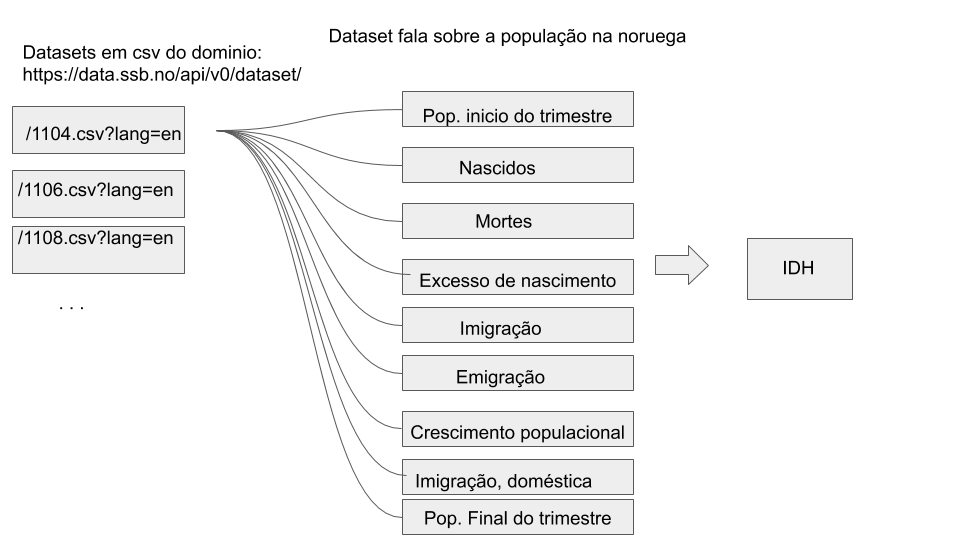